In [1]:
#Importing the required libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, roc_auc_score, f1_score
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

import warnings
warnings.filterwarnings('ignore')

In [2]:
#function for reducing the memory usage

def reduce_memory_usage(df):
    start_memory = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_memory))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_memory = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_memory))
    print('Decreased by {:.1f}%'.format(100 * (start_memory - end_memory) / start_memory))
    
    return df

In [3]:
#reading the train identity CSV files and performing memory usage reduction

train_identity = pd.read_csv("/kaggle/input/ieee-fraud-detection/train_identity.csv")
train_identity = reduce_memory_usage(train_identity)
train_identity.head()

Memory usage of dataframe is 45.12 MB
Memory usage after optimization is: 10.00 MB
Decreased by 77.8%


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [4]:
#reading the train transaction CSV files and performing memory usage reduction

train_transaction =pd.read_csv("/kaggle/input/ieee-fraud-detection/train_transaction.csv")
train_transaction = reduce_memory_usage(train_transaction)
train_transaction.head()

Memory usage of dataframe is 1775.15 MB
Memory usage after optimization is: 487.16 MB
Decreased by 72.6%


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#reading the test identity CSV files and performing memory usage reduction

test_identity = pd.read_csv("/kaggle/input/ieee-fraud-detection/test_identity.csv")
test_identity = reduce_memory_usage(test_identity)
test_identity.head()

Memory usage of dataframe is 44.39 MB
Memory usage after optimization is: 9.84 MB
Decreased by 77.8%


,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [6]:
#reading the test transaction CSV files and performing memory usage reduction

test_transaction = pd.read_csv("/kaggle/input/ieee-fraud-detection/test_transaction.csv")
test_transaction = reduce_memory_usage(test_transaction)
test_transaction.head()

Memory usage of dataframe is 1519.24 MB
Memory usage after optimization is: 425.24 MB
Decreased by 72.0%


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.953125,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,285.000000,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.937500,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Merging transaction and identity train data
train_df = pd.merge(train_transaction, train_identity, how='left')
print(train_df.shape)
len_train_df = len(train_df)
del train_transaction, train_identity
train_df.head()

(590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: category(31), float16(354), float32(45), int16(1), int32(2), int8(1)
memory usage: 525.6 MB


In [9]:
train_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.0,588975.0,586281.0,524834.0,524834.0,...,139369.0,4.511300e+04,139318.0,139261.0,5159.0,5169.000000,4747.000000,5132.0000,5163.00000,77586.0
mean,3.282270e+06,0.034990,7.372311e+06,NaN,9898.734658,NaN,NaN,NaN,NaN,NaN,...,NaN,inf,NaN,NaN,inf,inf,12.820312,inf,inf,NaN
std,1.704744e+05,0.183755,4.617224e+06,NaN,4901.170153,NaN,0.0,0.0,NaN,0.0,...,0.0,1.561523e+00,NaN,NaN,inf,6.898438,2.371094,97.4375,32.09375,0.0
min,2.987000e+06,0.000000,8.640000e+04,0.250977,1000.000000,100.0,100.0,100.0,100.0,10.0,...,100.0,1.000000e+01,100.0,100.0,100.0,10.000000,11.000000,100.0000,100.00000,0.0
25%,3.134635e+06,0.000000,3.027058e+06,43.312500,6019.000000,214.0,150.0,166.0,204.0,87.0,...,166.0,1.300000e+01,266.0,256.0,252.0,14.000000,11.000000,321.0000,119.00000,24.0
50%,3.282270e+06,0.000000,7.306528e+06,68.750000,9678.000000,361.0,150.0,226.0,299.0,87.0,...,166.0,1.500000e+01,341.0,472.0,252.0,14.000000,11.000000,321.0000,149.00000,24.0
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.0,150.0,226.0,330.0,87.0,...,225.0,1.500000e+01,427.0,533.0,486.5,14.000000,15.000000,371.0000,169.00000,32.0
max,3.577539e+06,1.000000,1.581113e+07,31936.000000,18396.000000,600.0,231.0,237.0,540.0,102.0,...,229.0,2.900000e+01,671.0,661.0,854.0,44.000000,26.000000,548.0000,216.00000,32.0


In [10]:
test_df = pd.merge(test_transaction, test_identity, how='left')
test_df.columns = train_df.drop('isFraud', axis=1).columns
print(test_df.shape)
del test_transaction, test_identity
test_df.head()

(506691, 433)


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.953125,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,285.000000,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.937500,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


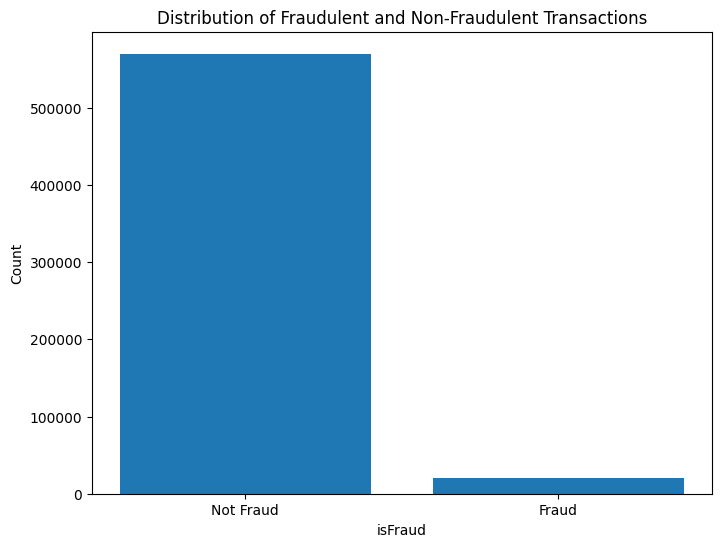

In [11]:
#Checking the class imbalance

fraud_counts = train_df['isFraud'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(fraud_counts.index, fraud_counts.values)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'])
plt.show()

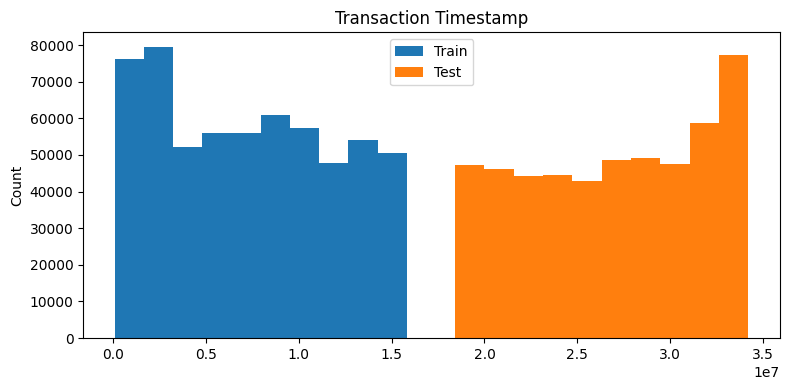

In [12]:
# Timestamp of train and test data

plt.figure(figsize=(8, 4))
plt.hist(train_df['TransactionDT'], label='Train')
plt.hist(test_df['TransactionDT'], label='Test')
plt.ylabel('Count')
plt.title('Transaction Timestamp')
plt.legend()
plt.tight_layout()
plt.show()

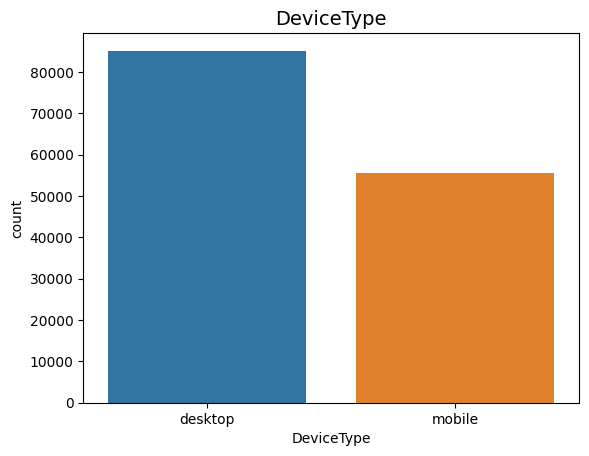

In [13]:
#visualizing the device types

ax = sns.countplot(x="DeviceType", data=train_df)
ax.set_title('DeviceType', fontsize=14)
plt.show()

In [14]:
#visualizing the card types

cards = ['card1', 'card2', 'card3', 'card4', 'card5', 'card6']
for i in cards:
    print ("Unique ",i, " = ",train_df[i].nunique())

Unique  card1  =  13553
Unique  card2  =  500
Unique  card3  =  114
Unique  card4  =  4
Unique  card5  =  119
Unique  card6  =  4


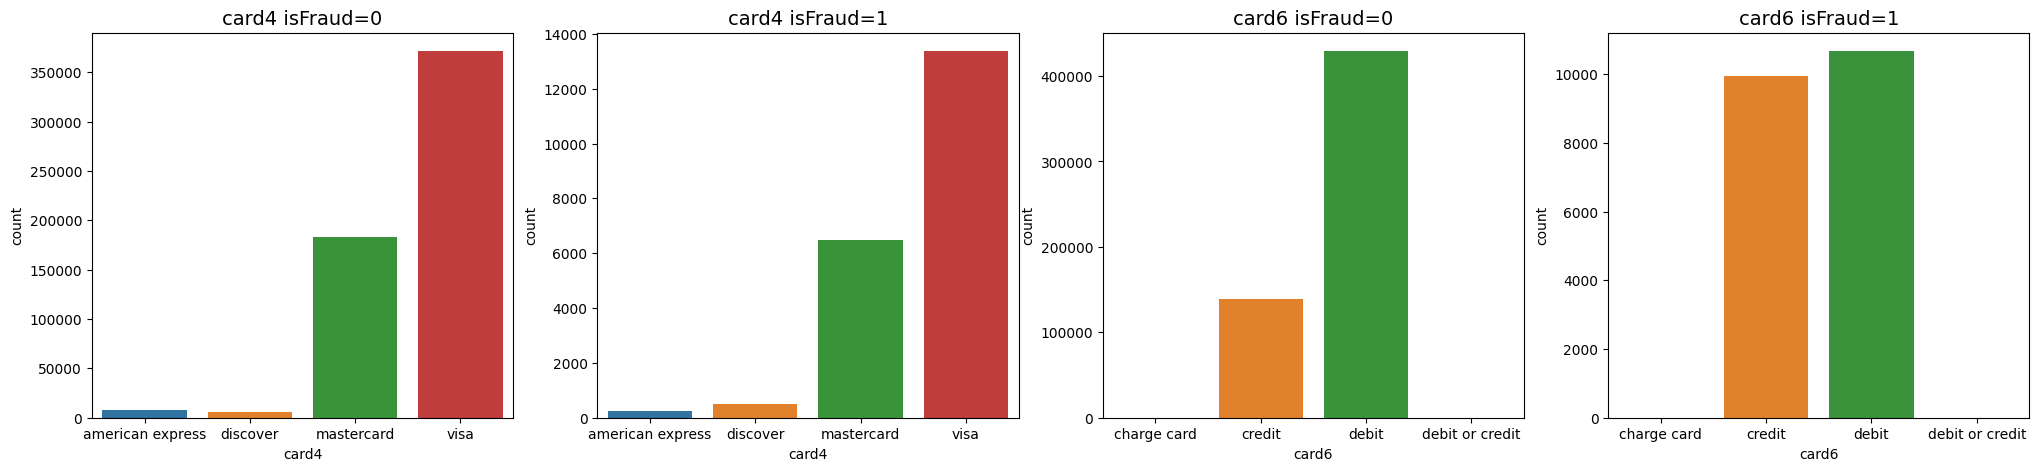

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(25,5))

sns.countplot(x="card4", ax=ax[0], data=train_df.loc[train_df['isFraud'] == 0])
ax[0].set_title('card4 isFraud=0', fontsize=14)
sns.countplot(x="card4", ax=ax[1], data=train_df.loc[train_df['isFraud'] == 1])
ax[1].set_title('card4 isFraud=1', fontsize=14)
sns.countplot(x="card6", ax=ax[2], data=train_df.loc[train_df['isFraud'] == 0])
ax[2].set_title('card6 isFraud=0', fontsize=14)
sns.countplot(x="card6", ax=ax[3], data=train_df.loc[train_df['isFraud'] == 1])
ax[3].set_title('card6 isFraud=1', fontsize=14)
plt.show()

In [16]:
#visualizing the email domains in both P and R types

"emaildomain" in train_df.columns, "emaildomain" in train_df.columns

(False, False)

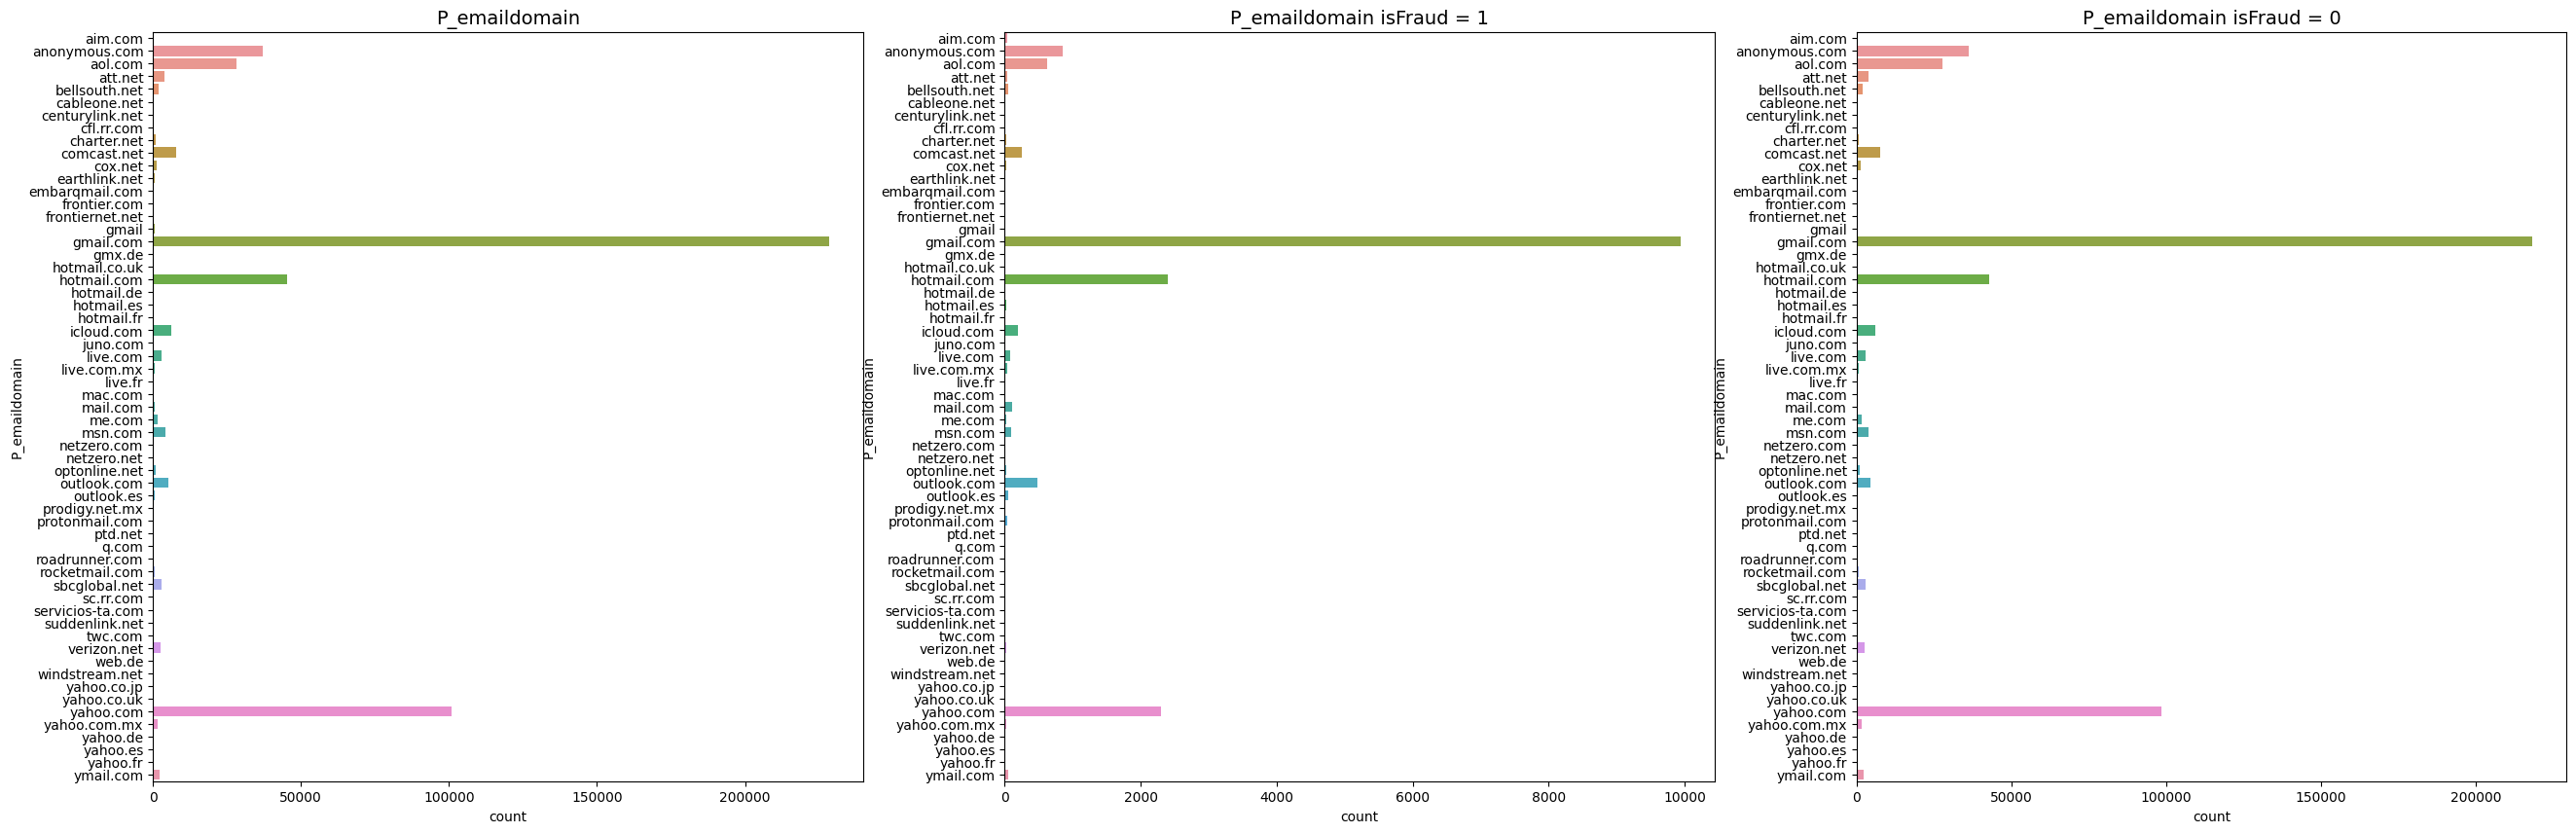

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(32,10))

sns.countplot(y="P_emaildomain", ax=ax[0], data=train_df)
ax[0].set_title('P_emaildomain', fontsize=14)
sns.countplot(y="P_emaildomain", ax=ax[1], data=train_df.loc[train_df['isFraud'] == 1])
ax[1].set_title('P_emaildomain isFraud = 1', fontsize=14)
sns.countplot(y="P_emaildomain", ax=ax[2], data=train_df.loc[train_df['isFraud'] == 0])
ax[2].set_title('P_emaildomain isFraud = 0', fontsize=14)
plt.show()

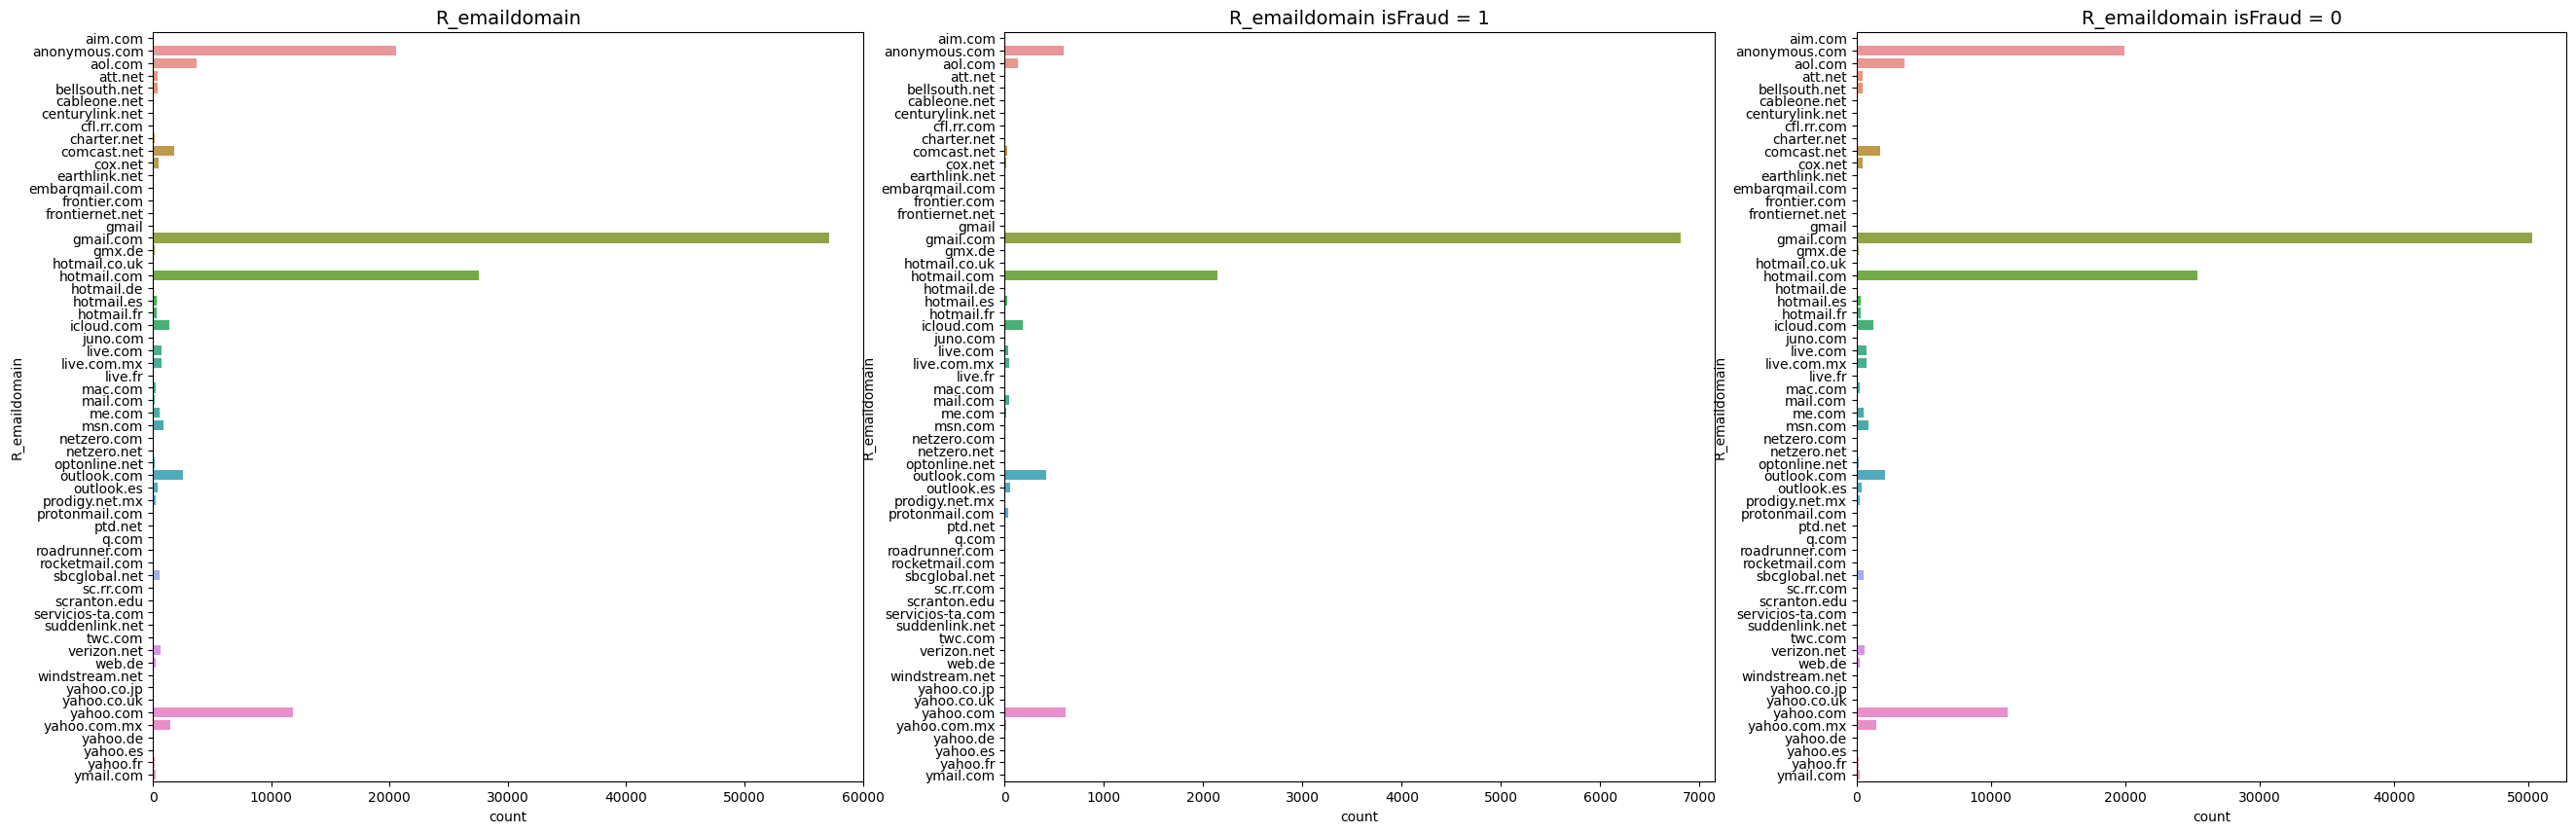

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(32,10))

sns.countplot(y="R_emaildomain", ax=ax[0], data=train_df)
ax[0].set_title('R_emaildomain', fontsize=14)
sns.countplot(y="R_emaildomain", ax=ax[1], data=train_df.loc[train_df['isFraud'] == 1])
ax[1].set_title('R_emaildomain isFraud = 1', fontsize=14)
sns.countplot(y="R_emaildomain", ax=ax[2], data=train_df.loc[train_df['isFraud'] == 0])
ax[2].set_title('R_emaildomain isFraud = 0', fontsize=14)
plt.show()

In [19]:
#Handling missing values

combined_df = pd.concat([train_df.drop(columns=['isFraud', 'TransactionID']), test_df.drop(columns='TransactionID')])
print(combined_df.shape)
y = train_df['isFraud']
print(y.shape)
mv = combined_df.isnull().sum()/len(combined_df)
combined_mv_df = combined_df.drop(columns=mv[mv>0.2].index)
del combined_df, train_df, test_df
print(combined_mv_df.shape)

(1097231, 432)
(590540,)
(1097231, 180)


In [20]:
# Filtering numerical data
num_mv_df = combined_mv_df.select_dtypes(include=np.number)
print(num_mv_df.shape)

# Filtering categorical data
cat_mv_df = combined_mv_df.select_dtypes(exclude=np.number)
print(cat_mv_df.shape)
del combined_mv_df

# Filling missing values by median for numerical columns 
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
num_df = pd.DataFrame(imp_median.fit_transform(num_mv_df), columns=num_mv_df.columns)
del num_mv_df
print(num_df.shape)

# Filling missing values by most frequent value for categorical columns
imp_max = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat_df = pd.DataFrame(imp_max.fit_transform(cat_mv_df), columns=cat_mv_df.columns)
del cat_mv_df
print(cat_df.shape)

combined_df_cleaned = pd.concat([num_df, cat_df], axis=1)
del num_df, cat_df

print(f'Total missing values: {combined_df_cleaned.isnull().sum().sum()}')
print(combined_df_cleaned.shape)
combined_df_cleaned.head()

(1097231, 176)
(1097231, 4)
(1097231, 176)
(1097231, 4)
Total missing values: 0
(1097231, 180)


,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,...,V316,V317,V318,V319,V320,V321,ProductCD,card4,card6,P_emaildomain
0,86400.0,68.5,13926.0,361.0,150.0,142.0,315.0,87.0,1.0,1.0,...,0.0,117.0,0.0,0.0,0.0,0.0,W,discover,credit,gmail.com
1,86401.0,29.0,2755.0,404.0,150.0,102.0,325.0,87.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,W,mastercard,credit,gmail.com
2,86469.0,59.0,4663.0,490.0,150.0,166.0,330.0,87.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,W,visa,debit,outlook.com
3,86499.0,50.0,18132.0,567.0,150.0,117.0,476.0,87.0,2.0,5.0,...,50.0,1404.0,790.0,0.0,0.0,0.0,W,mastercard,debit,yahoo.com
4,86506.0,50.0,4497.0,514.0,150.0,102.0,420.0,87.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,H,mastercard,credit,gmail.com


In [21]:
#categorical encoding using one-hot encoding

combined_df_encoded = pd.get_dummies(combined_df_cleaned, drop_first=True)
print(combined_df_encoded.shape)
del combined_df_cleaned
combined_df_encoded.head()

(1097231, 245)


,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,86400.0,68.5,13926.0,361.0,150.0,142.0,315.0,87.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,86401.0,29.0,2755.0,404.0,150.0,102.0,325.0,87.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,86469.0,59.0,4663.0,490.0,150.0,166.0,330.0,87.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,86499.0,50.0,18132.0,567.0,150.0,117.0,476.0,87.0,2.0,5.0,...,False,False,False,False,True,False,False,False,False,False
4,86506.0,50.0,4497.0,514.0,150.0,102.0,420.0,87.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# preparing train and test data
X = combined_df_encoded.iloc[:len_train_df]
print(X.shape)
test = combined_df_encoded.iloc[len_train_df:]
print(test.shape)
del combined_df_encoded

(590540, 245)
(506691, 245)


In [23]:
# Time-based train validation splitting with 20% data in validation set
train = pd.concat([X, y], axis=1)
train.sort_values('TransactionDT', inplace=True)
X = train.drop(['isFraud'], axis=1)
y = train['isFraud']
splitting_index = int(0.8*len(X))
X_train = X.iloc[:splitting_index].values
X_val = X.iloc[splitting_index:].values
y_train = y.iloc[:splitting_index].values
y_val = y.iloc[splitting_index:].values
test = test.values
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
del y, train

(472432, 245) (118108, 245) (472432,) (118108,)


In [24]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test)
del X_train, X_val, test

# Class imbalance check
pd.value_counts(y_train)

0    455833
1     16599
Name: count, dtype: int64

In [25]:
# Applying SMOTE to handle with the class imbalance by oversampling
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
print(X_train_smote.shape, y_train_smote.shape)
del X_train_scaled, y_train
pd.value_counts(y_train_smote)

(911666, 245) (911666,)


0    455833
1    455833
Name: count, dtype: int64

# Models

In [26]:
# Random Forest Model

rfc = RandomForestClassifier(criterion='entropy', max_features='sqrt', max_samples=0.5, min_samples_split=80)
rfc.fit(X_train_smote, y_train_smote)
y_predproba = rfc.predict_proba(X_val_scaled)
print(f'Validation AUC={roc_auc_score(y_val, y_predproba[:, 1])}')

Validation AUC=0.8873288187464323


Accuracy: 0.9672164459647102
Precision: 0.5286396181384249
F1 Score: 0.4778856526429342
AUC: 0.8873288187464323


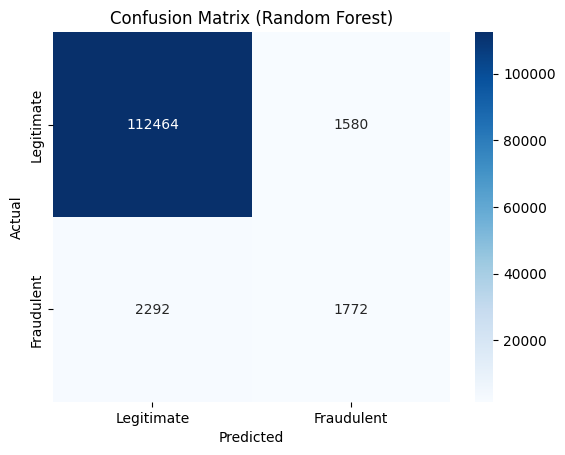

In [27]:
# Predictions
y_pred = rfc.predict(X_val_scaled)
y_pred_proba = rfc.predict_proba(X_val_scaled)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred_proba)

# Print Metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

# Plot Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Legitimate", "Fraudulent"], yticklabels=["Legitimate", "Fraudulent"])
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Cross-validated AUC scores: [0.62948311 0.8096334  0.7453017 ]
Average Cross-validated AUC: 0.728139401453677
Accuracy: 0.9217665187794222
Precision: 0.19351018474656562
Recall: 0.4020669291338583
F1 Score: 0.26127278541733295
Validation AUC: 0.7577534633510702
Confusion Matrix:
[[107234   6810]
 [  2430   1634]]


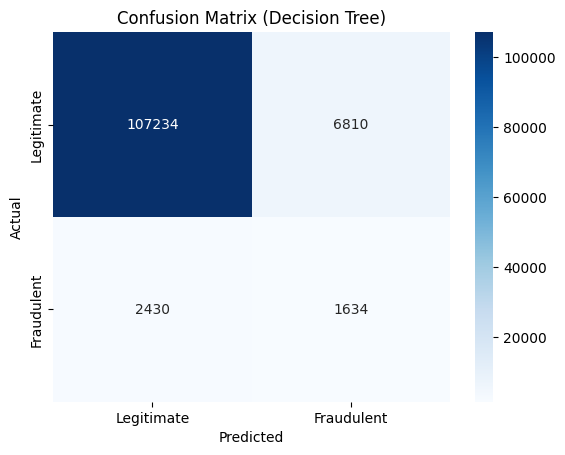

In [28]:
#Decision tree model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Custom scorer for ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Initializing the Decision Tree model
dtc = DecisionTreeClassifier(criterion='entropy', max_features='sqrt', min_samples_split=80, random_state=42)

# Cross-validation with 3 folds
cv_scores = cross_val_score(dtc, X_train_smote, y_train_smote, cv=3, scoring=roc_auc_scorer)

# Average AUC across folds
average_auc = cv_scores.mean()
print(f"Cross-validated AUC scores: {cv_scores}")
print(f"Average Cross-validated AUC: {average_auc}")

# Training the model on the full training data
dtc.fit(X_train_smote, y_train_smote)

# Predictions on validation data
y_pred = dtc.predict(X_val_scaled)
y_pred_proba = dtc.predict_proba(X_val_scaled)[:, 1]

# Metrics calculation
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
validation_auc = roc_auc_score(y_val, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Validation AUC: {validation_auc}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Legitimate", "Fraudulent"], yticklabels=["Legitimate", "Fraudulent"])
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Cross-validated AUC scores: [0.47520097 0.84453334 0.4471065 ]
Average Cross-validated AUC: 0.5889469371674668
Accuracy: 0.9648457344125716
Precision: 0.4879847078099399
Recall: 0.43971456692913385
F1 Score: 0.46259383898524464
Validation AUC: 0.8750904148371246
Confusion Matrix:
[[112169   1875]
 [  2277   1787]]


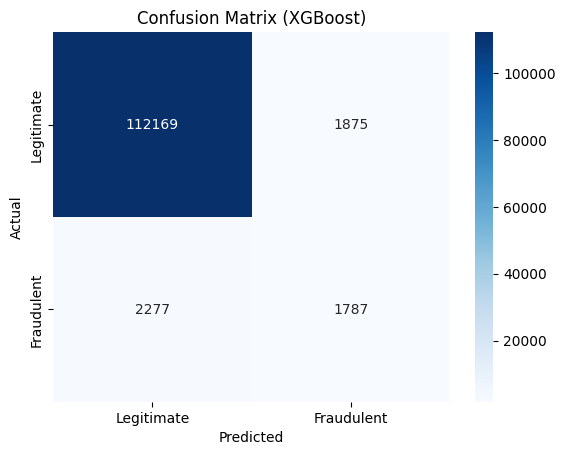

In [29]:
#XGBoost Model

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the XGBoost model
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Cross-validation with 3 folds
cv_scores = cross_val_score(xgb, X_train_smote, y_train_smote, cv=3, scoring='roc_auc')

# Average AUC across folds
average_auc = cv_scores.mean()
print(f"Cross-validated AUC scores: {cv_scores}")
print(f"Average Cross-validated AUC: {average_auc}")

# Train the model on the full training data
xgb.fit(X_train_smote, y_train_smote)

# Predictions on validation data
y_pred_proba_xgb = xgb.predict_proba(X_val_scaled)[:, 1]
y_pred_xgb = xgb.predict(X_val_scaled)

# Metrics calculation
accuracy = accuracy_score(y_val, y_pred_xgb)
precision = precision_score(y_val, y_pred_xgb)
recall = recall_score(y_val, y_pred_xgb)
f1 = f1_score(y_val, y_pred_xgb)
validation_auc = roc_auc_score(y_val, y_pred_proba_xgb)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Validation AUC: {validation_auc}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_xgb)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Legitimate", "Fraudulent"], yticklabels=["Legitimate", "Fraudulent"])
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
#CNN Model

model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_smote.shape[1]),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_smote, y_train_smote, validation_data=(X_val_scaled, y_val), epochs=20, batch_size=64, verbose=1)

# Predict probabilities
y_pred_proba_nn = model.predict(X_val_scaled).ravel()

# Predict classes
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)


Epoch 1/20
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.7908 - loss: 0.4485 - val_accuracy: 0.9129 - val_loss: 0.2488
Epoch 2/20
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.8461 - loss: 0.3423 - val_accuracy: 0.9089 - val_loss: 0.2615
Epoch 3/20
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.8596 - loss: 0.3153 - val_accuracy: 0.9228 - val_loss: 0.2431
Epoch 4/20
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.8678 - loss: 0.3004 - val_accuracy: 0.9206 - val_loss: 0.2295
Epoch 5/20
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.8726 - loss: 0.2904 - val_accuracy: 0.9057 - val_loss: 0.2684
Epoch 6/20
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.8768 - loss: 0.2824 - val_accuracy: 0.9328 - val_loss: 0.2169
Epoch 7/20
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.8800 - loss: 0.2764 - val_accuracy: 0.9261 - val_loss: 0.2279
Epoch 8/20
14245/14245 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 

Confusion Matrix (Neural Network):
[[109102   4942]
 [  1840   2224]]
Precision (Neural Network): 0.3103544515768909
Accuracy (Neural Network): 0.9425779794764114
F1 Score (Neural Network): 0.39608192341941234
AUC (Neural Network): 0.8520045693270203


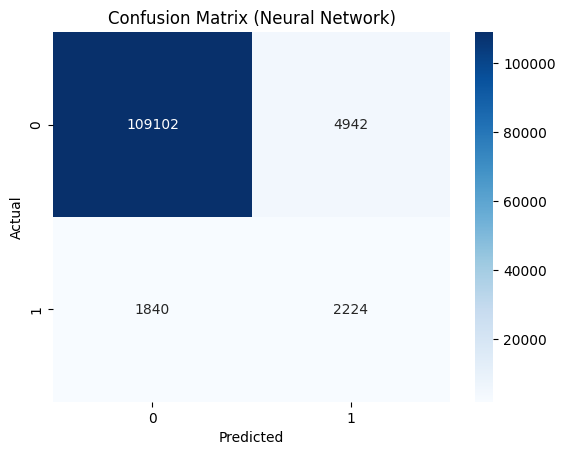

In [31]:
# Confusion Matrix
cm_nn = confusion_matrix(y_val, y_pred_nn)
print("Confusion Matrix (Neural Network):")
print(cm_nn)

# Precision, Accuracy, F1 Score, and AUC
precision_nn = precision_score(y_val, y_pred_nn)
accuracy_nn = accuracy_score(y_val, y_pred_nn)
f1_nn = f1_score(y_val, y_pred_nn)
auc_nn = roc_auc_score(y_val, y_pred_proba_nn)

print(f"Precision (Neural Network): {precision_nn}")
print(f"Accuracy (Neural Network): {accuracy_nn}")
print(f"F1 Score (Neural Network): {f1_nn}")
print(f"AUC (Neural Network): {auc_nn}")

# Plot Confusion Matrix
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Neural Network)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
